**Mateusz Podporski, nr. alb. 152774**

### Dane i ograniczenia zadania

**Legenda:**  
$s_n$ – szampon naturalny  
$s_r$ – szampon rodzinny  

**Ceny jednostkowe:**
$$
s_n = 90 \qquad s_r = 55
$$

**Dostępne zasoby:**
$$
a = 300 \qquad b = 300 \qquad c = 400
$$

**Ograniczenia:**
$$
\begin{align*}
0.1s_n + 0.2s_r &\leq 300 \\
0.3s_n + 0.1s_r &\leq 300 \\
0.5s_n + 0s_r &\leq 400
\end{align*}
$$


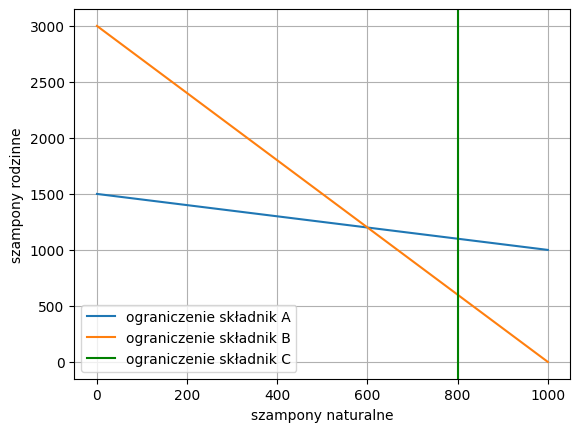

In [1]:
import numpy as np
import matplotlib.pyplot as plt


x = np.arange(0, 1001)
ra = 1500 - 0.5 * x
rb = 3000 - 3 * x
rc = 800  

plt.plot(x, ra, label="ograniczenie składnik A")
plt.plot(x, rb, label="ograniczenie składnik B")
plt.axvline(x=rc, color='green', label="ograniczenie składnik C")
plt.xlabel('szampony naturalne')
plt.ylabel('szampony rodzinne')
plt.legend()
plt.grid(True)
plt.show()

### Wierzchołek A
$$
r_a = 1500
$$

---

### Wierzchołek B
$$
\begin{align*}
1500 - 0.5x &= 3000 - 3x \\
-0.5x &= 1500 - 3x \\
2.5x &= 1500 \\
x &= \frac{1500}{2.5} = 600
\end{align*}
$$

$$
\begin{align*}
r_a &= 1500 - 0.5 \times 600 \\
r_a &= 1200
\end{align*}
$$

---

### Wierzchołek C
$$
\begin{align*}
r_b &= 3000 - 3 \times 800 \\
r_b &= 600
\end{align*}
$$

---



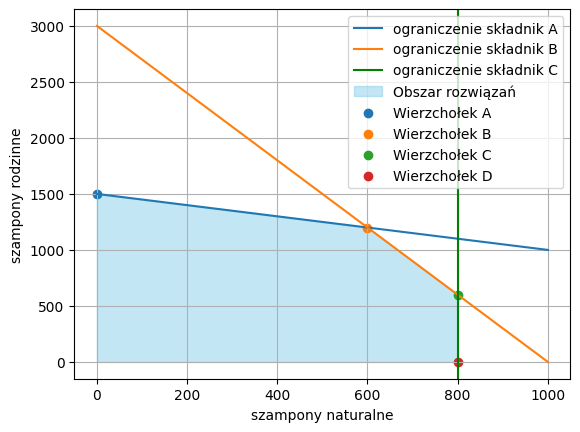

In [2]:
plt.plot(x, ra, label="ograniczenie składnik A")
plt.plot(x, rb, label="ograniczenie składnik B")
plt.axvline(x=rc, color='green', label="ograniczenie składnik C")
plt.xlabel('szampony naturalne')
plt.ylabel('szampony rodzinne')
plt.grid(True)
# Wyznaczenie obszaru rozwiązań
r_min = np.minimum(ra, rb)
r_min = np.where(x <= rc, r_min, np.nan)
plt.fill_between(x, r_min, 0, color='skyblue', alpha=0.5, label="Obszar rozwiązań")

# Zaznaczenie wierzchołków
plt.scatter(0,1500, label="Wierzchołek A")
plt.scatter(600,1200, label="Wierzchołek B")
plt.scatter(800,600, label="Wierzchołek C")
plt.scatter(800,0, label="Wierzchołek D")
plt.legend()
plt.show()


### Obliczanie zysku Z

**Legenda:**  
$s_n$ – szampon naturalny  
$s_r$ – szampon rodzinny  
$$
Z = s_n \times 90 + s_r \times 55
$$
---
#### Punkt A $(0, 1500)

$$
\begin{align*}

Z &= 0 \times 90 + 1500 \times 55 \\
Z &= 82500
\end{align*}
$$

---
#### Punkt B (600, 1200)

$$
\begin{align*}
Z &= 600 \times 90 + 1200 \times 55 \\
Z &= 120000
\end{align*}
$$

---
#### Punkt C (800, 600)

$$
\begin{align*}
Z &= 800 \times 90 + 600 \times 55 \\
Z &= 105000
\end{align*}
$$

---
#### Punkt D $(800, 0)

$$
\begin{align*}
Z &= 800 \times 90 + 0 \times 45 \\
Z &= 72000
\end{align*}
$$

---
Rozwiązaniem jest punkt B (600, 1200) z zyskiem 120000


In [4]:
from scipy.optimize import linprog
c = [-90,-55]
A = [[0.1,0.2],[0.3,0.1],[0.5,0]]
b = [300,300,400]

res = linprog(c,A_ub=A, b_ub=b)
print(-res.fun)
print(res.x)


120000.0
[ 600. 1200.]


Obie metody doprowadziły do tego samego optymalnego rozwiązania

### Wnioski – porównanie metod

**Metoda graficzna** jest prosta i pozwala zobaczyć obszar rozwiązań oraz wierzchołki, w których może wystąpić optimum. Dobrze sprawdza się przy dwóch zmiennych, ułatwiając zrozumienie problemu i jego ograniczeń.

**Metoda Simplex** jest algorytmiczna i skuteczna przy większej liczbie zmiennych oraz ograniczeń. Automatycznie znajduje rozwiązanie optymalne i jest znacznie szybsza w zastosowaniach praktycznych.

**Podsumowanie:**  
Metoda graficzna nadaje się do nauki i prostych zadań, a Simplex do rzeczywistych problemów, gdzie liczy się efektywność i skalowalność.
